In [1]:
import warnings
warnings.filterwarnings('ignore')

# Step 1. Exploratory Data Analysis
---

In the process of **Exploratory Data Analysis (EDA)**, our primary focus will be on conducting a comprehensive examination of these follwing attributes in the images from the provided dataset. This observation will enable us to extract insights and understand the underlying patterns that would be instrumental in forming our subsequent **Data Preprocessing** process.
| **Attribute**   | **Description**                                                                              | **Usage**                                                                                                                                                                                    |
|--------------|-------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| FileType     | Refers to the image file extension                                                        | Different file formats contain distinctive elements might potentially impact data consistency. These varying file types will be converted into a uniform format in the data preprocessing format, ensuring homogeneity and compatibility with analysis tools.  |
| Width        | The image width, measured in pixels                                                     | The width of an image can influence the image's resolution and overall size. To maintain consistency when feeding data into models, images may need resizing or changing in resolution.    |
| Height       | The image height, also measured in pixels                                                     | The height of an image can influence the image's resolution and overall size. To maintain consistency when feeding data into models, images may need resizing or changing in resolution.   |
| Ratio        | The aspect ratio of the image, computed by dividing the Width by the Height     | The ratio attribute, another crucial aspect, comes under observation. Standardizing image dimensions during the data processing phase necessitates this. Identifying the most common ratio among images will allow the selection of an optimal cropping ratio, preserving the majority of images' integrity and content.    |
| Mode         | The operational mode of the image                                       | Mode, an attribute connected to an image's transparency feature, receives close attention. A few selected modes support the alpha channel, critical for rendering transparency. This attribute's observation ensures image compatibility with these modes.                                                                           |
| Bands        | A string that contains all the bands of an image, each separated by a space character                                 | The bands of an image can provide information about the color and depth of the image. Understanding the bands can help in image processing tasks such as color correction or image enhancement.  |
| Transparency | If the image possesses transparency                                                     | The identification and processing of transparent images receive priority due to the poor performance of machine learning algorithms with such images. This step mitigates potential issues during the machine learning phase.   |
| Animated     | If the image contains more than one frame                                               | Given that machine learning algorithms cannot directly process images containing more than one frame, any animated images in the dataset require isolation and individual frame extraction.       |
| Class        | Furniture category that the image belongs to, within the eight provided Furniture Categories: beds, chairs, dressers, lamps, sofas, tables | This process includes checking whether category distribution is even or skewed, which could impact machine learning models' performance.                                                                    |
 


## Setup
___


In [1]:
# Environment setups
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Utils functions
from utils.dataset import load
from utils.preprocess import find_duplicates, visualize_duplicates
from utils.plotting import create_countplot, create_k_samples

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Hoang\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [5]:
# Define Variables
rawDataPath = "../Data/Furniture_Data/"

## Load Dataset
---
Load dataset using the imported `load()` function from `dataset` file.

This function loads image data from a directory and populates a dictionary with the above-mentioned attributes of the image. 


If any image fails to load due to either being unidentified or a permission error, it gets skipped and an error message gets printed. 


The function finally returns a pandas DataFrame constructed from the dictionary.

In [2]:
# Load DataFrame
furniture_dataset = load(rawDataPath)

Error processing ../Data/Furniture_Data/lamps\Modern\11286modern-lighting.jpg: [Errno 13] Permission denied: '../Data/Furniture_Data/lamps\\Modern\\11286modern-lighting.jpg'


In [5]:
furniture_dataset.describe()

,Width,Height,Ratio
count,90083.000000,90083.000000,90083.000000
mean,340.858297,340.857698,1.000001
std,32.691822,32.689399,0.000403
min,224.000000,224.000000,1.000000
25%,350.000000,350.000000,1.000000
50%,350.000000,350.000000,1.000000
75%,350.000000,350.000000,1.000000
max,500.000000,446.000000,1.121076


In [4]:
furniture_dataset.head()

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Category,Interior_Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian


In [5]:
furniture_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90083 entries, 0 to 90082
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ImgPath         90083 non-null  object 
 1   FileType        90083 non-null  object 
 2   Width           90083 non-null  int64  
 3   Height          90083 non-null  int64  
 4   Ratio           90083 non-null  float64
 5   Mode            90083 non-null  object 
 6   Bands           90083 non-null  object 
 7   Transparency    90083 non-null  bool   
 8   Animated        90083 non-null  bool   
 9   Category        90083 non-null  object 
 10  Interior_Style  90083 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(6)
memory usage: 6.4+ MB


## Find Duplication
---


Preview the `k` number of images from the dataset

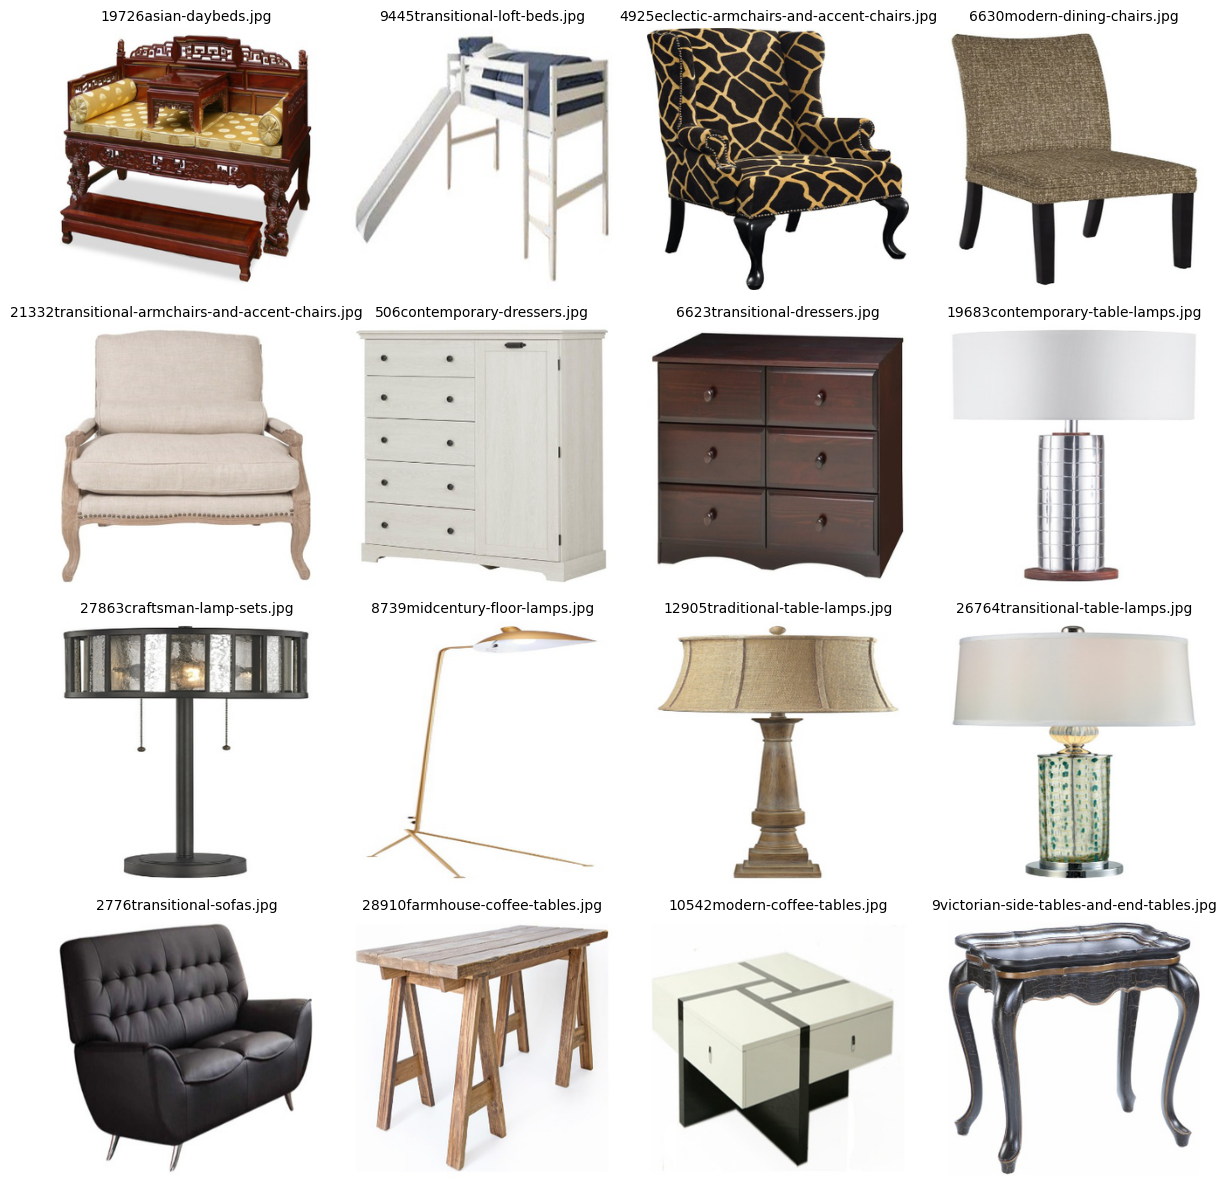

In [6]:
create_k_samples(rawDataPath, furniture_dataset, k=16)

The function `find_duplicates` find duplicate items in the dataset by computing a perceptual hash (pHash) for each image.

If the hash values of items are the same, they are consider duplication of each other.

In [7]:
duplicates_df = find_duplicates(furniture_dataset, rawDataPath)

Function `visualize_duplicates` w

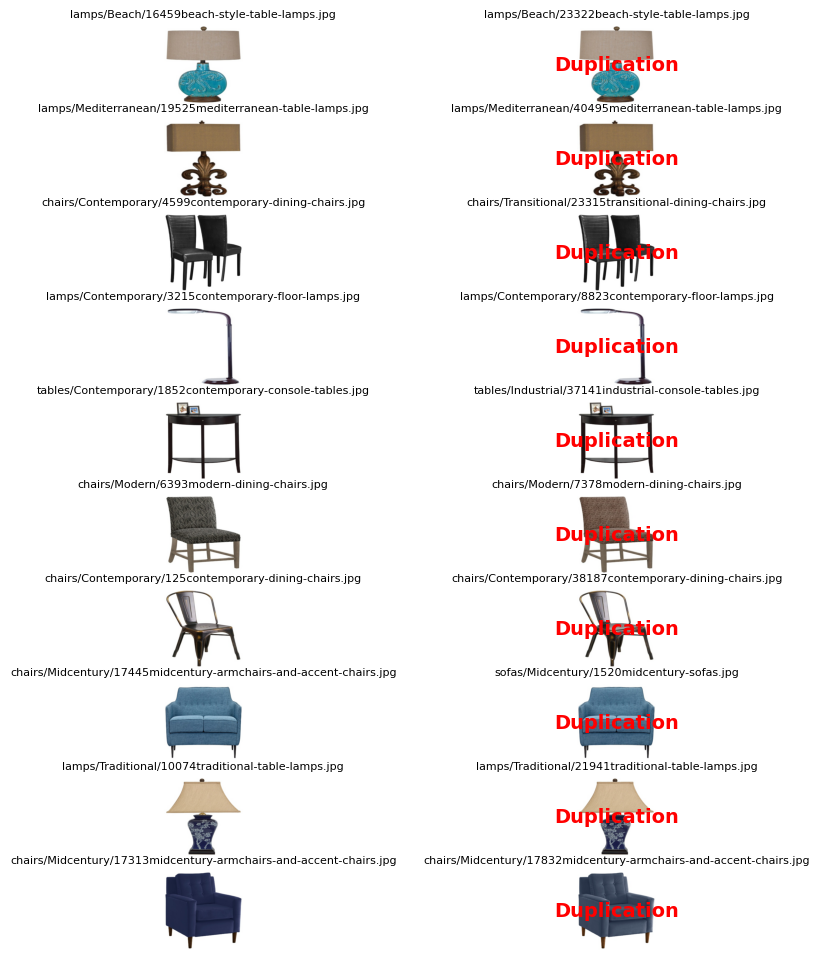

In [8]:
visualize_duplicates(duplicates_df, 10)


In [9]:
# Length of the duplicates dataframe
print(len(duplicates_df), "duplicated images")

19393 duplicated images


As we can see from the visualization above, there are almost 20,000 duplicated images in our dataset which could contribute to the noise in the dataset, not ideal for training our model.

In [10]:

furniture_dataset.head()

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Category,Interior_Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian


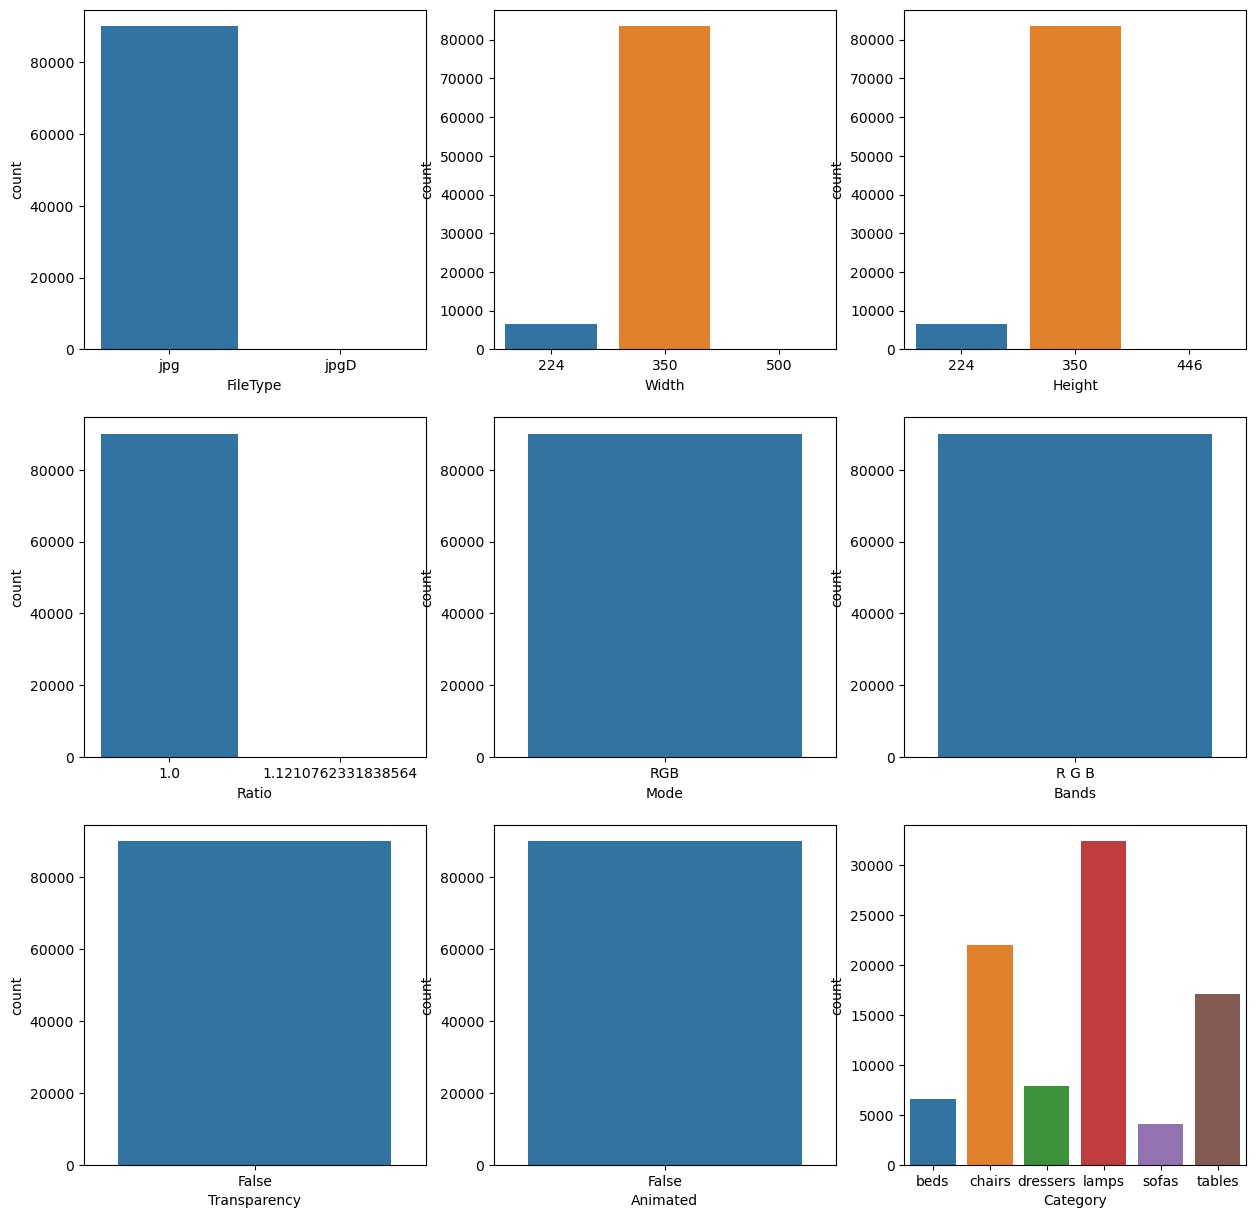

In [11]:
# plotting the countplot of the furniture dataset

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Create countplots for each column in the dataset
create_countplot(furniture_dataset, 'FileType', ax[0, 0])
create_countplot(furniture_dataset, 'Width', ax[0, 1])
create_countplot(furniture_dataset, 'Height', ax[0, 2])
create_countplot(furniture_dataset, 'Ratio', ax[1, 0])
create_countplot(furniture_dataset, 'Mode', ax[1, 1])
create_countplot(furniture_dataset, 'Bands', ax[1, 2])
create_countplot(furniture_dataset, 'Transparency', ax[2, 0])
create_countplot(furniture_dataset, 'Animated', ax[2, 1])
create_countplot(furniture_dataset, 'Category', ax[2, 2])


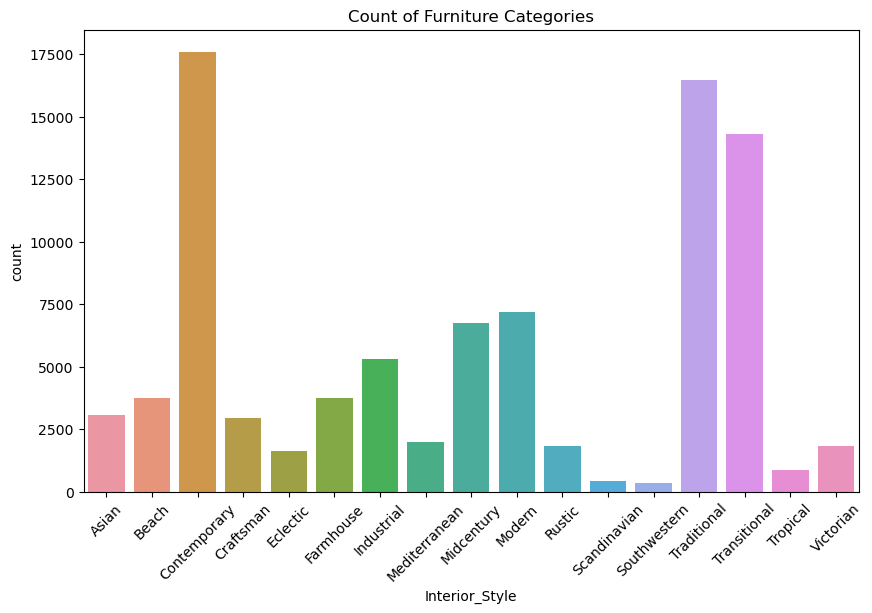

In [12]:
# Countplot of interior styles
plt.figure(figsize=(10, 6))
sns.countplot(data=furniture_dataset, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Furniture Categories')
plt.show()


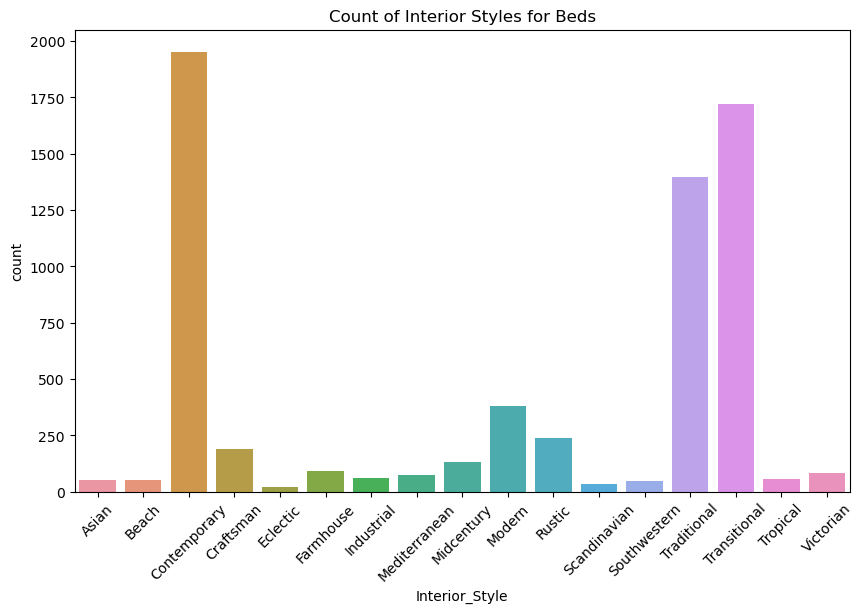

In [13]:
# EDA For each Category

# Beds

beds_df = furniture_dataset[furniture_dataset['Category'] == 'beds']

# Plot the countplot of interior styles for beds
plt.figure(figsize=(10, 6))
sns.countplot(data=beds_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Beds')
plt.show()


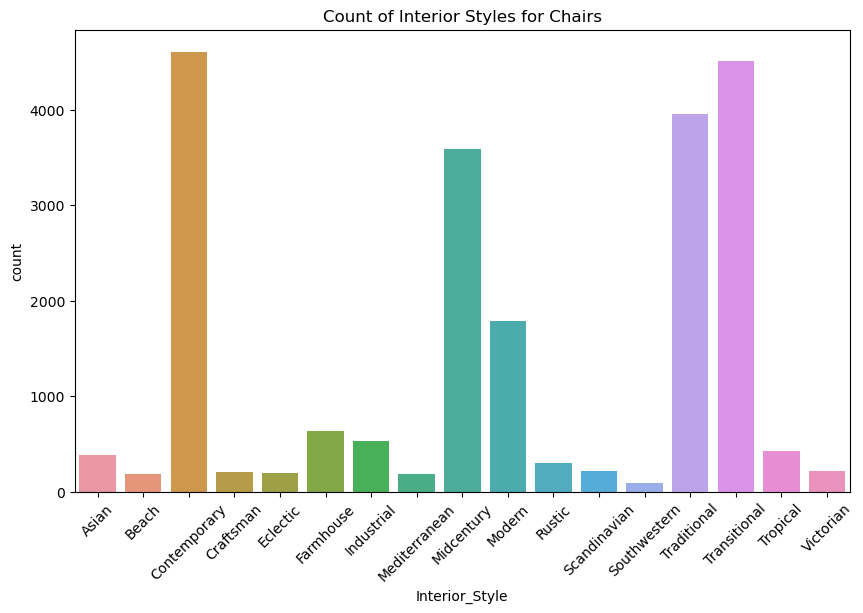

In [14]:
# Chairs

chairs_df = furniture_dataset[furniture_dataset['Category'] == 'chairs']

# Plot the countplot of interior styles for chairs
plt.figure(figsize=(10, 6))
sns.countplot(data=chairs_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Chairs')
plt.show()

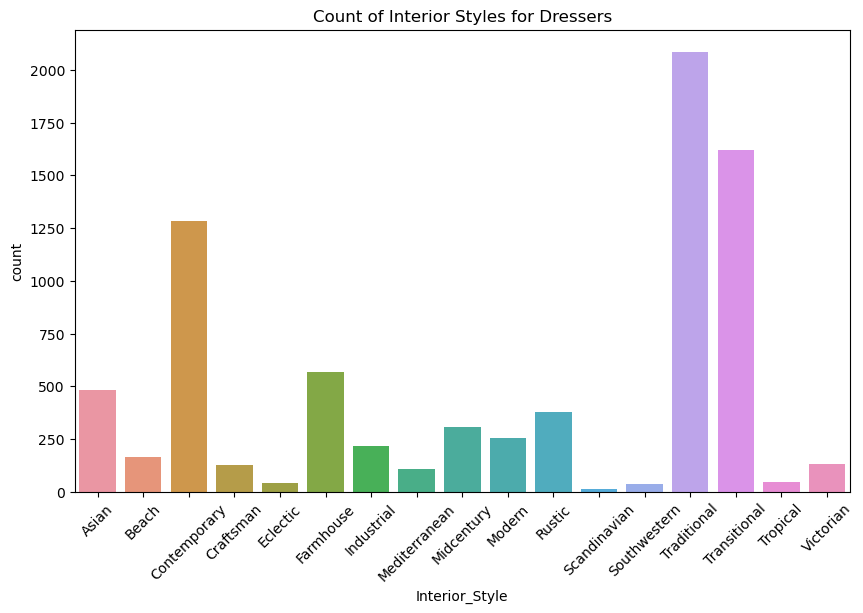

In [15]:
# Dressers

dressers_df = furniture_dataset[furniture_dataset['Category'] == 'dressers']

# Plot the countplot of interior styles for dressers
plt.figure(figsize=(10, 6))
sns.countplot(data=dressers_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Dressers')
plt.show()

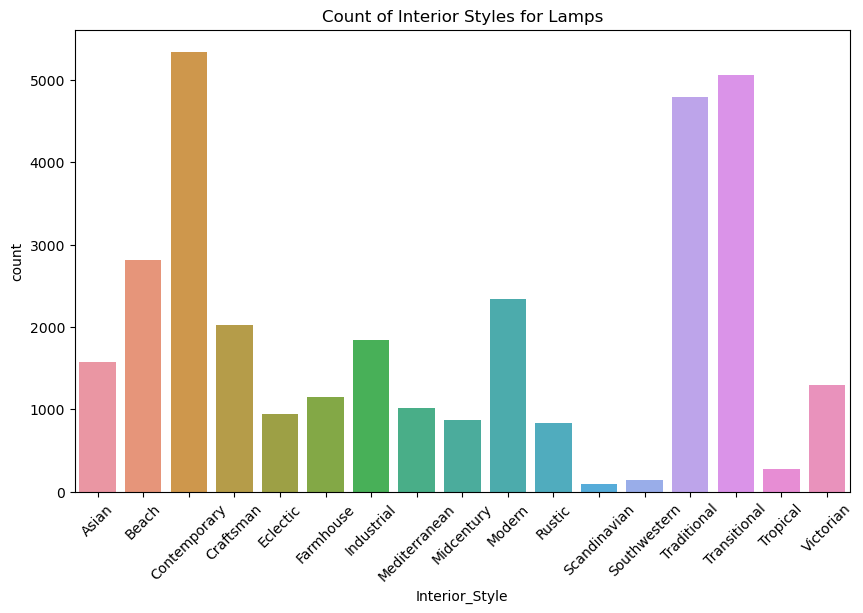

In [16]:
# Lamps

lamps_df = furniture_dataset[furniture_dataset['Category'] == 'lamps']

# Plot the countplot of interior styles for lamps
plt.figure(figsize=(10, 6))
sns.countplot(data=lamps_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Lamps')
plt.show()

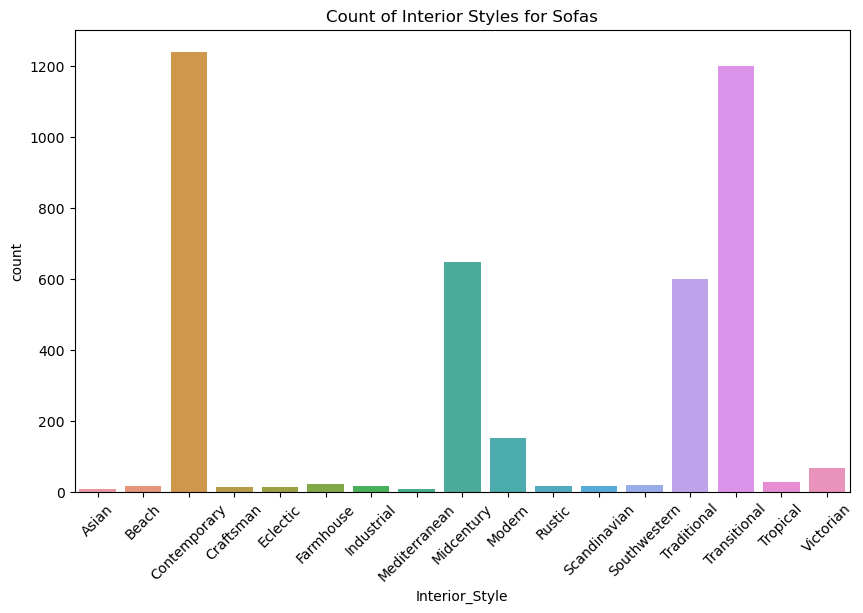

In [17]:
# Sofas

sofas_df = furniture_dataset[furniture_dataset['Category'] == 'sofas']

# Plot the countplot of interior styles for sofas
plt.figure(figsize=(10, 6))
sns.countplot(data=sofas_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Sofas')
plt.show()


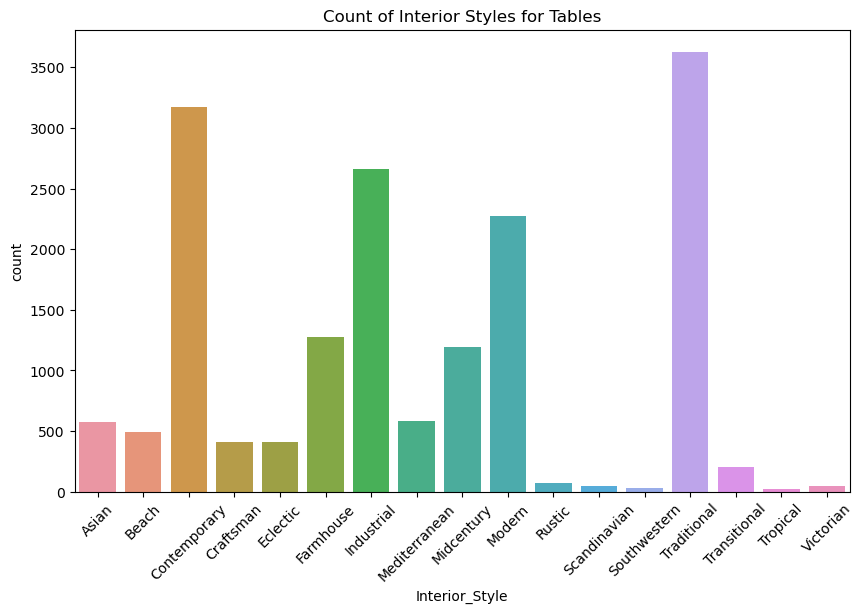

In [18]:
# Tables

tables_df = furniture_dataset[furniture_dataset['Category'] == 'tables']

# Plot the countplot of interior styles for tables
plt.figure(figsize=(10, 6))
sns.countplot(data=tables_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Tables')
plt.show()